In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sln
%matplotlib inline

In [0]:
train=pd.read_csv('/content/drive/My Drive/train.csv')

In [0]:
test=pd.read_csv('/content/drive/My Drive/test.csv')

In [0]:
pd.set_option('display.max.columns',999)

In [7]:
train.shape

(116058, 29)

In [8]:
train['m13'].value_counts()/train.shape[0]

0    0.99452
1    0.00548
Name: m13, dtype: float64

# EDA1

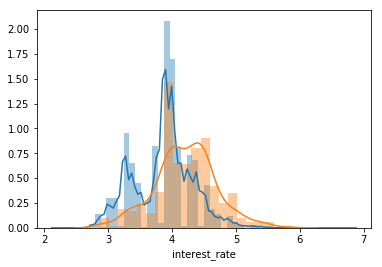

In [0]:
sln.distplot(train[train['m13']==0]['interest_rate'])
sln.distplot(train[train['m13']==1]['interest_rate'])

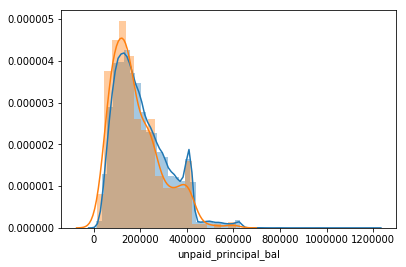

In [0]:
#almost similar
sln.distplot(train[train['m13']==0]['unpaid_principal_bal'])
sln.distplot(train[train['m13']==1]['unpaid_principal_bal'])

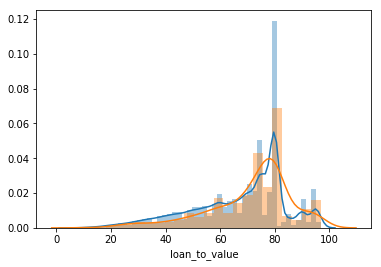

In [0]:
#almost similar
sln.distplot(train[train['m13']==0]['loan_to_value'])
sln.distplot(train[train['m13']==1]['loan_to_value'])

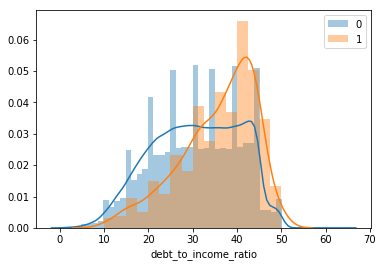

In [0]:
#
sln.distplot(train[train['m13']==0]['debt_to_income_ratio'],label='0')
sln.distplot(train[train['m13']==1]['debt_to_income_ratio'],label='1')
plt.legend()

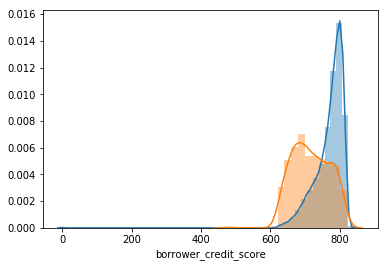

In [0]:
#
sln.distplot(train[train['m13']==0]['borrower_credit_score'])
sln.distplot(train[train['m13']==1]['borrower_credit_score'])

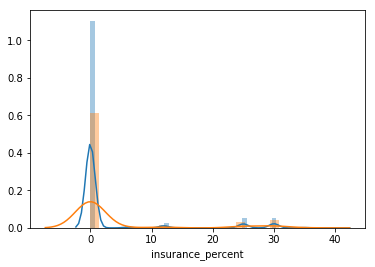

In [0]:
sln.distplot(train[train['m13']==0]['insurance_percent'])
sln.distplot(train[train['m13']==1]['insurance_percent'])

In [0]:
#i doubt there is a high correlation between deliquency months
train['m9'].value_counts()

0     115687
1        273
2         41
3         25
5          8
4          7
6          6
7          5
8          4
11         1
10         1
Name: m9, dtype: int64

In [0]:
#only pickup m columns
m_col=[col for col in train.columns if col.startswith('m')]

In [0]:
m_data=train[m_col]

In [0]:
m_data.corr()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
m1,1.000000,0.265275,0.231312,0.219213,0.192049,0.156476,0.148796,0.139711,0.143186,0.129697,0.128891,0.110718,0.092054
m2,0.265275,1.000000,0.488618,0.459826,0.408129,0.354627,0.325504,0.278404,0.270268,0.255760,0.251472,0.225030,0.146921
m3,0.231312,0.488618,1.000000,0.573943,0.496987,0.447824,0.406566,0.337897,0.323383,0.305280,0.303852,0.281148,0.157394
m4,0.219213,0.459826,0.573943,1.000000,0.684547,0.587581,0.566954,0.494744,0.474123,0.450428,0.435032,0.400727,0.218956
m5,0.192049,0.408129,0.496987,0.684547,1.000000,0.667621,0.624085,0.553949,0.550279,0.520029,0.507042,0.471030,0.259529
m6,0.156476,0.354627,0.447824,0.587581,0.667621,1.000000,0.778205,0.699499,0.675990,0.637420,0.632097,0.585527,0.287712
m7,0.148796,0.325504,0.406566,0.566954,0.624085,0.778205,1.000000,0.786592,0.742966,0.705385,0.694015,0.642545,0.309072
m8,0.139711,0.278404,0.337897,0.494744,0.553949,0.699499,0.786592,1.000000,0.842178,0.787306,0.767348,0.721974,0.339362
m9,0.143186,0.270268,0.323383,0.474123,0.550279,0.675990,0.742966,0.842178,1.000000,0.870422,0.839257,0.782674,0.369138
m10,0.129697,0.255760,0.305280,0.450428,0.520029,0.637420,0.705385,0.787306,0.870422,1.000000,0.879410,0.812710,0.367840


In [0]:
import scipy.stats as ss

In [0]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


In [0]:
val_corr=[]
for col1 in m_col:
    val_btw=[]
    for col2 in m_col:
        val=cramers_v(train[col1],train[col2])
        val_btw.append(val)
    val_corr.append(val_btw)    

In [0]:
corr_df=pd.DataFrame(val_corr,columns=m_col,index=m_col)

In [0]:
#we see middle order m1 are very highly correlated

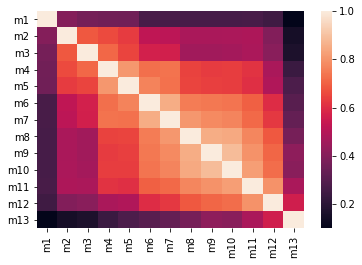

In [0]:
sln.heatmap(corr_df)

In [0]:
#lets see what imprtant variables are if we consider only these variables
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()

In [0]:
X=m_data.drop(['m13'],axis=1)
y=m_data['m13']

In [0]:
rc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
rc.feature_importances_

array([0.01862274, 0.01591803, 0.01392481, 0.01920988, 0.04927122,
       0.0228336 , 0.02568346, 0.04219097, 0.07919043, 0.09626906,
       0.18646463, 0.43042116])

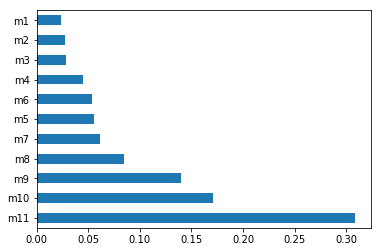

In [0]:
feat_importances = pd.Series(rc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [0]:
#but we clearly m12 is dependent on m11 and so on......
#lets pick up 'm12' only and focus on feature engineering

In [0]:
#unpaid balance assume its the initial so we can calculate actual buying value
train['total_worth']=(train['unpaid_principal_bal']/train['loan_to_value'])*100

In [0]:
#test
test['total_worth']=(test['unpaid_principal_bal']/test['loan_to_value'])*100

In [0]:
train['down_payment']=train['total_worth']-train['unpaid_principal_bal']

In [0]:
#test
test['down_payment']=test['total_worth']-test['unpaid_principal_bal']

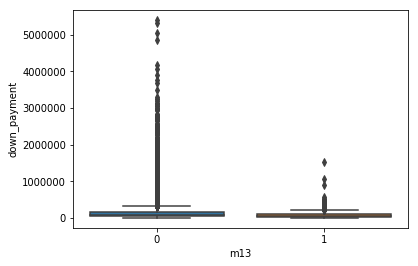

In [13]:
sln.boxplot(x=train['m13'],y=train['down_payment'])

In [0]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,total_worth,down_payment
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,225263.157895,11263.157895
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,200000.000000,56000.000000
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,746938.775510,380938.775510
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,293478.260870,158478.260870
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,155000.000000,31000.000000


In [0]:
#loan_purpose
train['loan_purpose'].unique()

array(['C86', 'B12', 'A23'], dtype=object)

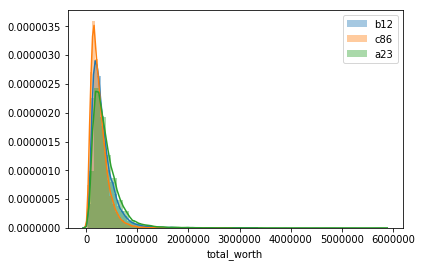

In [0]:
sln.distplot(train[train['loan_purpose']=='B12']['total_worth'],label='b12')
sln.distplot(train[train['loan_purpose']=='C86']['total_worth'],label='c86')
sln.distplot(train[train['loan_purpose']=='A23']['total_worth'],label='a23')
plt.legend()

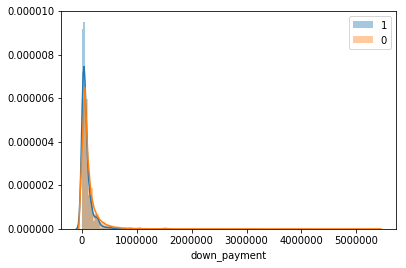

In [0]:
sln.distplot(train[train['m13']==1]['down_payment'],label='1')
sln.distplot(train[train['m13']==0]['down_payment'],label='0')
plt.legend()

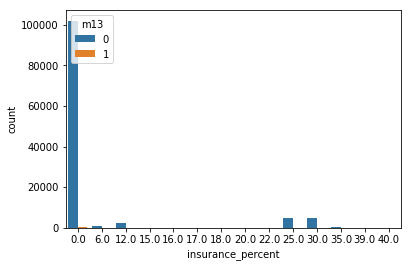

In [73]:
sln.countplot(train['insurance_percent'],hue=train['m13'])

In [76]:
train[train['co-borrower_credit_score']!=0][['co-borrower_credit_score','borrower_credit_score']].corr()

,co-borrower_credit_score,borrower_credit_score
co-borrower_credit_score,1.000000,0.632932
borrower_credit_score,0.632932,1.000000


In [0]:
train['co_greater']=np.where(train['co-borrower_credit_score']>train['borrower_credit_score'],1,0)

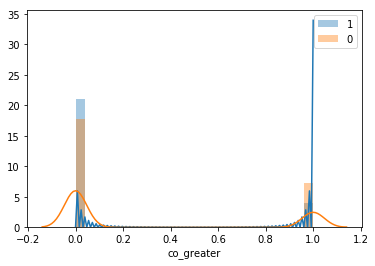

In [78]:
sln.distplot(train[train['m13']==1]['co_greater'],label='1')
sln.distplot(train[train['m13']==0]['co_greater'],label='0')
plt.legend()

In [0]:
#if unpaid=='debt'
#we can calculate income
train['income']=(train['unpaid_principal_bal']/train['debt_to_income_ratio'])

In [0]:
train['log_income']=np.log(train['income'])

In [0]:
#test
test['income']=(test['unpaid_principal_bal']/test['debt_to_income_ratio'])

In [0]:
test['log_income']=np.log(test['income'])

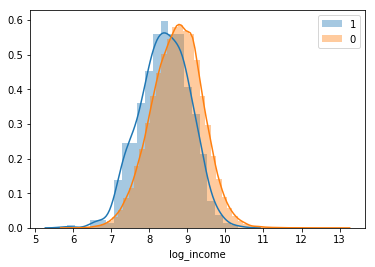

In [85]:
sln.distplot(train[train['m13']==1]['log_income'],label='1')
sln.distplot(train[train['m13']==0]['log_income'],label='0')
plt.legend()

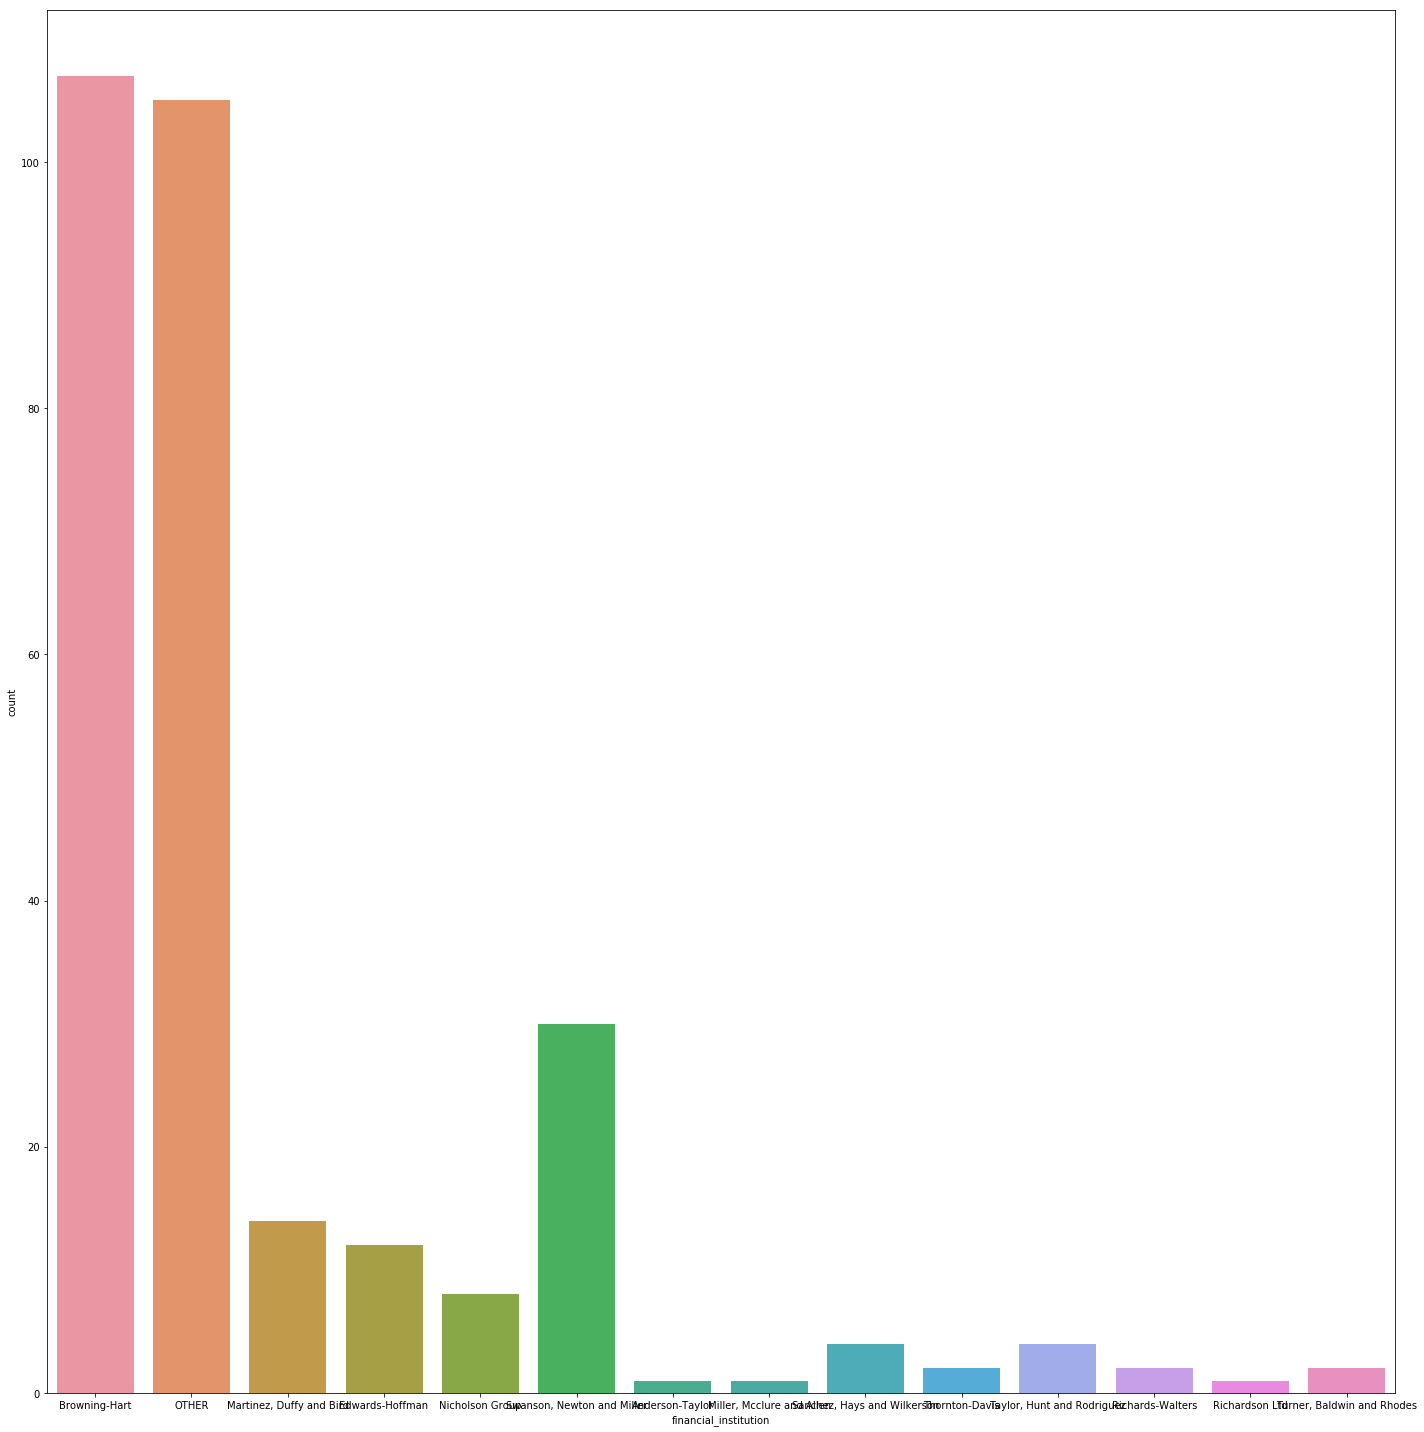

In [22]:
plt.figure(figsize=(20,20))
sln.countplot(train[train['m1']==1]['financial_institution'])
plt.tight_layout()

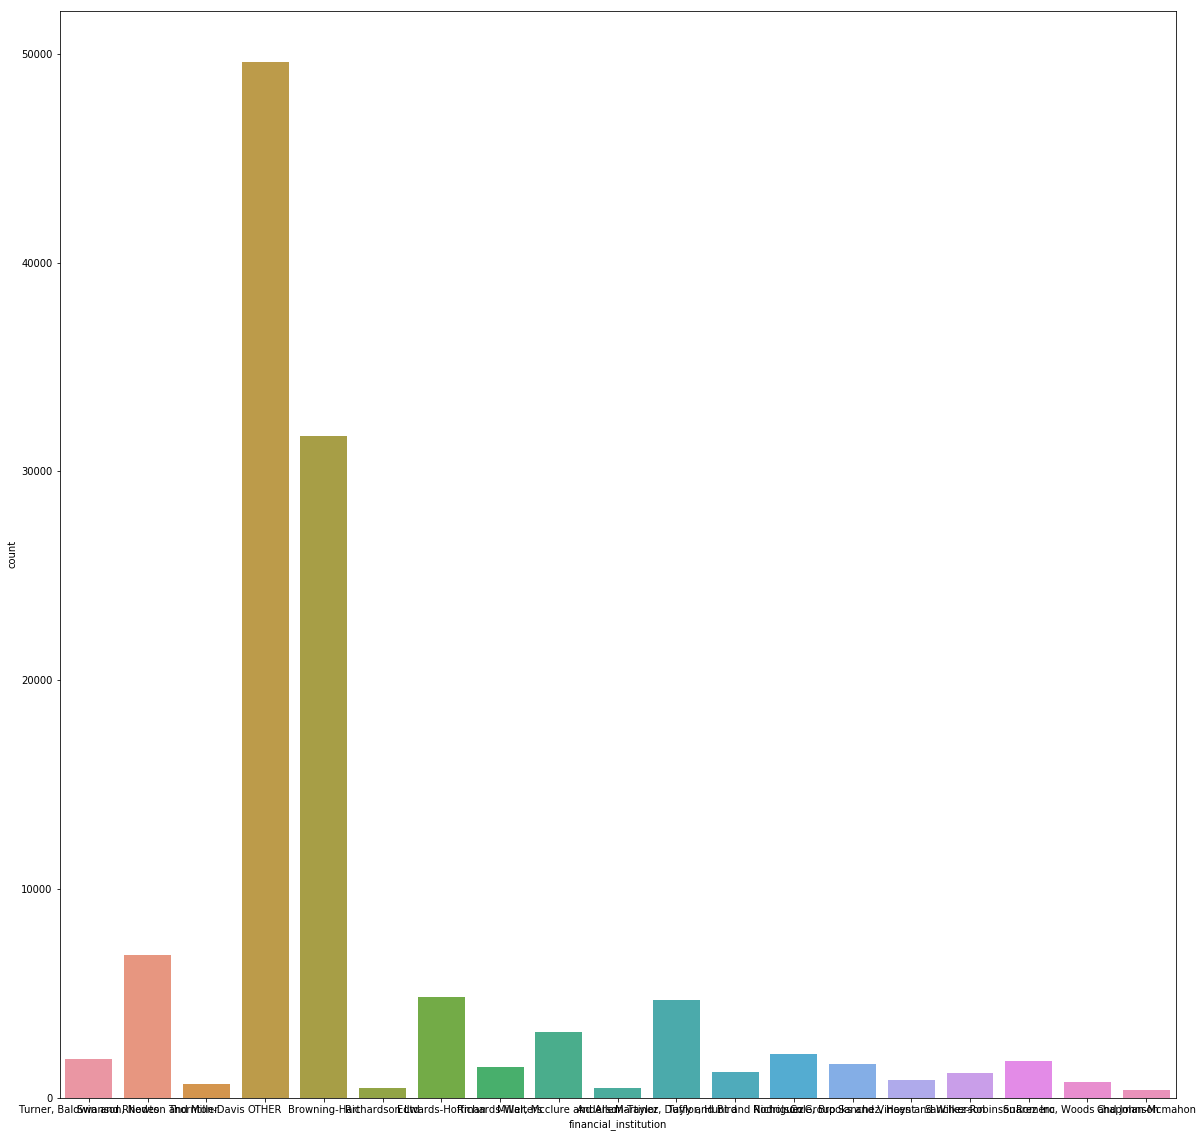

In [23]:
plt.figure(figsize=(20,20))
sln.countplot(train[train['m1']==0]['financial_institution'])

In [24]:
train[train['m13']==0].describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,total_worth,down_payment,income
count,1.154220e+05,115422.000000,1.154220e+05,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.000000,115422.0,1.154220e+05,1.154220e+05,115422.000000
mean,5.494730e+11,3.867103,2.083720e+05,292.124404,67.410944,1.594644,30.714820,770.221985,2.782849,460.820823,0.003232,0.002764,0.001499,0.001326,0.001170,0.001941,0.001551,0.001845,0.001975,0.001845,0.002565,0.002149,0.001897,0.0,3.366598e+05,1.282879e+05,7687.201755
std,2.597382e+11,0.460212,1.147101e+05,89.814852,17.299037,0.490963,9.730348,41.955064,8.091584,381.793640,0.056756,0.059025,0.042322,0.043139,0.042333,0.055814,0.046421,0.051372,0.053272,0.056204,0.066031,0.061985,0.051874,0.0,2.413826e+05,1.718625e+05,6382.927872
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.375000e+04,4.329897e+02,354.838710
25%,3.245428e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.786667e+05,4.000000e+04,3928.571429
50%,5.486673e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,741.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.763158e+05,7.714286e+04,6268.292683
75%,7.743179e+11,4.125000,2.790000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.250000e+05,1.494068e+05,9697.674419
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,4.000000,5.000000,6.000000,7.000000,8.000000,8.000000,7.000000,0.0,5.800000e+06,5.394000e+06,470000.000000


In [25]:
train[train['m13']==1].describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,total_worth,down_payment,income
count,6.360000e+02,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.0,6.360000e+02,6.360000e+02,636.000000
mean,5.389809e+11,4.206182,181776.729560,320.699686,71.242138,1.328616,35.727987,716.352201,3.410377,240.154088,0.007862,0.081761,0.103774,0.119497,0.185535,0.292453,0.342767,0.424528,0.522013,0.643082,0.742138,0.907233,1.127358,1.0,2.689210e+05,8.714430e+04,5419.377118
std,2.629717e+11,0.483438,106890.659386,74.464996,15.454618,0.470080,8.449567,52.960974,8.923109,344.803367,0.088386,0.306744,0.383007,0.457515,0.588749,0.773176,0.945172,1.097870,1.246533,1.421976,1.639911,1.826113,2.012044,0.0,1.840213e+05,1.129297e+05,3629.410406
min,1.006886e+11,2.875000,14000.000000,120.000000,11.000000,1.000000,10.000000,480.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.750000e+04,2.052632e+03,341.463415
25%,3.097579e+11,3.875000,101750.000000,360.000000,64.000000,1.000000,31.000000,673.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.471295e+05,2.941544e+04,2844.444444
50%,5.357101e+11,4.250000,153000.000000,360.000000,75.000000,1.000000,38.000000,712.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.208108e+05,5.556818e+04,4444.444444
75%,7.705956e+11,4.500000,240250.000000,360.000000,80.000000,2.000000,42.000000,760.000000,0.000000,687.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,3.464881e+05,9.980853e+04,7114.583333
max,9.996719e+11,5.875000,610000.000000,360.000000,97.000000,2.000000,50.000000,821.000000,35.000000,817.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.0,1.928571e+06,1.523571e+06,31052.631579


In [0]:
#convert date
train['origination_date']=pd.to_datetime(train['origination_date'])

In [0]:
test['origination_date']=pd.to_datetime(test['origination_date'])

In [0]:
train['first_payment_date']=train['first_payment_date'].apply(lambda x:x.replace('/',' '))

In [0]:
#test
test['first_payment_date']=test['first_payment_date'].apply(lambda x:x.split('-')[0])

In [40]:
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,total_worth,down_payment,income
0,1,Y,Browning-Hart,3.875,417000,360,1,Apr,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,556000.00000,139000.00000,20850.000000
1,2,X,OTHER,4.500,113000,360,1,Apr,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,141250.00000,28250.00000,3424.242424
2,3,Y,OTHER,4.500,72000,360,1,Mar,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96000.00000,24000.00000,2117.647059
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,1,Apr,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0,300000.00000,177000.00000,5125.000000
4,5,X,Browning-Hart,3.250,166000,180,1,Apr,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0,313207.54717,147207.54717,13833.333333


In [0]:
from datetime import datetime
train['first_payment_date']=train['first_payment_date'].apply(lambda x:datetime.strptime(x, '%m %Y'))

In [0]:
#test
test['origination_date']=test['origination_date'].apply(lambda x:x.month)

In [0]:
test['first_payment_dur']=(test['first_payment_date']-test['origination_date'])*30

In [0]:
monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
inv_map = {v: k for k, v in monthDict.items()}
test['first_payment_date']=test['first_payment_date'].replace(inv_map)

In [0]:
train['first_payment_dur']=(train['first_payment_date']-train['origination_date'])
train['first_payment_dur']=train['first_payment_dur'].apply(lambda x: x.days)

In [0]:
train['pay_term_diff']=train['loan_term']-train['first_payment_dur']

In [0]:
#test
test['pay_term_diff']=test['loan_term']-test['first_payment_dur']

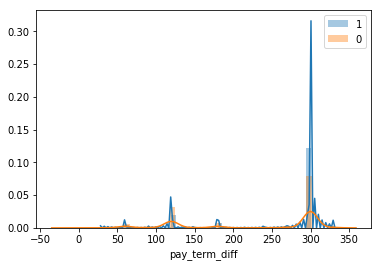

In [51]:
sln.distplot(train[train['m13']==1]['pay_term_diff'],label='1')
sln.distplot(train[train['m13']==0]['pay_term_diff'],label='0')
plt.legend()

In [0]:
train['loan_term_year']=train['loan_term']/360

In [0]:
#test
test['loan_term_year']=test['loan_term']/360

In [0]:
train['min_amount']=(train['unpaid_principal_bal']*train['interest_rate']*train['loan_term_year'])/100

In [0]:
#test
test['min_amount']=(test['unpaid_principal_bal']*test['interest_rate']*test['loan_term_year'])/100

In [0]:
train['min_Amount_greater']=np.where(train['debt']<0,1,0)

In [0]:
#test
test['min_Amount_greater']=np.where(test['debt']<0,1,0)

In [0]:
cramers_v(train['co-score'],train['m13'])

0.03968161343040214

In [0]:
train['debt']=train['income']-train['min_amount']

In [0]:
#test
test['debt']=test['income']-test['min_amount']

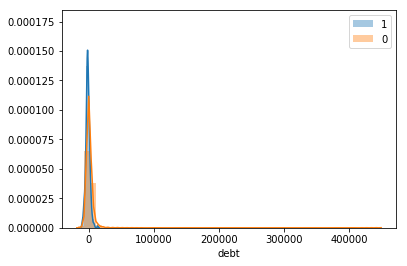

In [61]:
sln.distplot(train[train['m13']==1]['debt'],label='1')
sln.distplot(train[train['m13']==0]['debt'],label='0')
plt.legend()

In [0]:
X['sum']=X.sum(axis=1)

In [64]:
m_col.pop(-1)

'min_Amount_greater'

In [0]:
X_test=test[m_col]

In [0]:
train['sum']=train[['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']].sum(axis=1)

In [0]:
test['sum']=test[['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']].sum(axis=1)

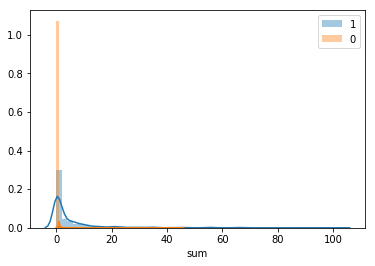

In [67]:
sln.distplot(train[train['m13']==1]['sum'],label='1')
sln.distplot(train[train['m13']==0]['sum'],label='0')
plt.legend()

In [0]:
train['sum_40']=np.where(train['sum']>40,1,0)

In [0]:
#test
test['sum_40']=np.where(test['sum']>40,1,0)

In [0]:
#lets choose our initial variables 
# aggregrate variables we will generate afterwards
dummy=pd.get_dummies(train[['loan_purpose','source']],drop_first=True)

In [0]:
dummy_test=pd.get_dummies(test[['loan_purpose','source']],drop_first=True)

In [0]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'total_worth', 'down_payment', 'income', 'first_payment_dur',
       'pay_term_diff', 'loan_term_year', 'min_amount', 'min_Amount_greater',
       'debt', 'sum', 'sum_40'],
      dtype='object')

In [0]:
X_cat=train[['sum_40']]

In [0]:
X_cat=test[['sum_40']]

In [0]:
X=train[['interest_rate','loan_to_value','debt_to_income_ratio','borrower_credit_score','first_payment_dur',
        'm12','pay_term_diff','loan_term_year','debt','sum']]

In [0]:
X_tes=test[['interest_rate','loan_to_value','debt_to_income_ratio','borrower_credit_score','first_payment_dur',
        'm12','pay_term_diff','loan_term_year','debt','sum']]

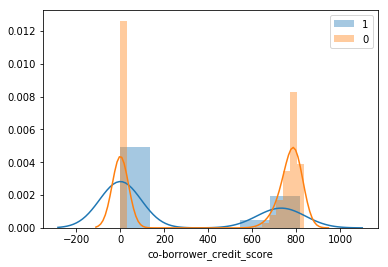

In [0]:
sln.distplot(train[train['m13']==1]['co-borrower_credit_score'],label='1')
sln.distplot(train[train['m13']==0]['co-borrower_credit_score'],label='0')
plt.legend()

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=pd.DataFrame(sc.fit_transform(X))

/home/prakhar/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/prakhar/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
X_scaled_test=pd.DataFrame(sc.transform(X_tes))

/home/prakhar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [0]:
comb=pd.concat([X_scaled,X_cat,dummy],axis=1)

In [0]:
comb_test=pd.concat([X_scaled_test,X_cat,dummy_test],axis=1)

In [0]:
comb.head()

,0,1,2,3,4,5,6,7,8,9,sum_40,loan_purpose_B12,loan_purpose_C86,source_Y,source_Z
0,0.826517,1.594300,-0.898419,-1.798764,0.091669,-0.045276,0.743094,0.754428,-0.023318,0.977475,0,0,1,0,1
1,2.182212,0.264177,1.362454,-1.727692,-0.045476,-0.045276,0.754176,0.754428,-0.782574,0.977475,0,1,0,1,0
2,-1.342595,-1.065945,0.232018,0.238642,-0.045476,-0.045276,-1.240689,-1.250874,0.758750,-0.054160,0,1,0,0,1
3,1.911073,-1.239439,1.362454,-3.243901,-0.045476,5.568680,0.754176,0.754428,-0.712716,4.072383,0,1,0,0,0
4,1.911073,0.726829,1.259687,-2.106744,-0.045476,61.708245,0.754176,0.754428,-0.654112,68.033811,1,0,1,0,0


In [0]:
comb_test.to_csv('new_features_test.csv',index=False)